In [1]:
# Import the QICK drivers and auxiliary libraries
from qick import *
import matplotlib.pyplot as plt
import numpy as np
# %pylab inline

In [2]:
qick_path = "/home/xilinx/jupyter_notebooks/alternative_firmware/photon_counting/qick_4x2.bit"

bitfile=qick_path

In [3]:
# Load bitstream with custom overlay
soc = QickSoc(bitfile=qick_path)
# Since we're running locally on the QICK, we don't need a separate QickConfig object.
# If running remotely, you could generate a QickConfig from the QickSoc:
#     soccfg = QickConfig(soc.get_cfg())
# or save the config to file, and load it later:
#     with open("qick_config.json", "w") as f:
#         f.write(soc.dump_cfg())
#     soccfg = QickConfig("qick_config.json")
soccfg = soc

In [17]:
class LoopbackProgram(AveragerProgram):
    def initialize(self):
        cfg=self.cfg   
        
        self.declare_readout(ch=self.cfg['ro_chs'][0], length=1020, freq=0, sel='input')
        
        self.synci(200)  # give processor some time to configure pulses
    
    def body(self):
        self.trigger(adcs=self.ro_chs, 
                     adc_trig_offset=self.cfg["adc_trig_offset"])
        self.synci(self.cfg['relax_delay'])

### Send/receive a pulse with <code> pulse_style </code> = <code> const </code>

In [27]:
config={"ro_chs":[1], # --Fixed
        "reps": 1,
        "relax_delay":300, # --us        
        "readout_length":1020, # [Clock ticks]
        "adc_trig_offset": 100, # [Clock ticks]
        "soft_avgs":1
       }

prog =LoopbackProgram(soccfg, config)
iq_list = prog.acquire_decimated(soc, progress=True)

  0%|          | 0/1 [00:00<?, ?it/s]

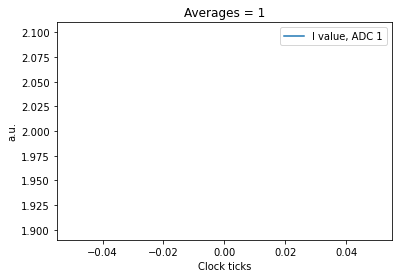

In [28]:
# Plot results.
plt.figure(1)
plt.plot(iq[0][0], label="I value, ADC %d"%(config['ro_chs'][ii]))
plt.ylabel("a.u.")
plt.xlabel("Clock ticks")
plt.title("Averages = " + str(config["soft_avgs"]))
plt.legend();